**YOUTUBE COMMENT ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix,roc_curve, auc

In [ ]:
df = pd.read_csv("/content/YOUTUBE.csv")

In [ ]:
df.head()

,comment,sentiment
0,This channel is my guilty pleasure. Can't stop...,positive
1,The host has such a soothing voice. Perfect fo...,positive
2,"I accidentally clicked on this, but I'm glad I...",positive
3,Why is there so much hate in the comments? Peo...,negative
4,I wish I could give this more than one like. I...,positive


In [ ]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [ ]:
df['cleaned_comment'] = df['comment'].apply(clean_text)

In [ ]:
y = LabelEncoder().fit_transform(df['sentiment'])

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_comment'])
X = tokenizer.texts_to_sequences(df['cleaned_comment'])
X = pad_sequences(X, maxlen=100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.summary()
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 188ms/step - accuracy: 0.5642 - loss: 0.6881 - val_accuracy: 0.7308 - val_loss: 0.6316
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5665 - loss: 0.6604 - val_accuracy: 0.7885 - val_loss: 0.5951
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.7599 - loss: 0.5766 - val_accuracy: 0.8846 - val_loss: 0.4476
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - accuracy: 0.8837 - loss: 0.4156 - val_accuracy: 0.9038 - val_loss: 0.2865
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.9213 - loss: 0.2462 - val_accuracy: 0.9038 - val_loss: 0.2551



LSTM Evaluation
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        55
           1       0.92      0.91      0.91        74

    accuracy                           0.90       129
   macro avg       0.90      0.90      0.90       129
weighted avg       0.90      0.90      0.90       129



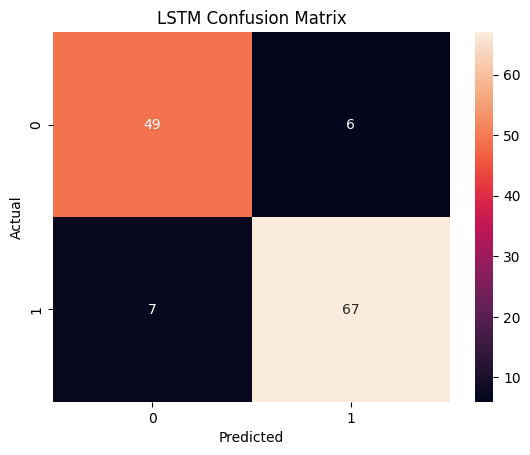

In [ ]:
print("\nLSTM Evaluation")
y_pred_lstm_prob = lstm_model.predict(X_test)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype("int32")
print(classification_report(y_test, y_pred_lstm))
sns.heatmap(confusion_matrix(y_test, y_pred_lstm.flatten()), annot=True, fmt='d')
plt.title("LSTM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

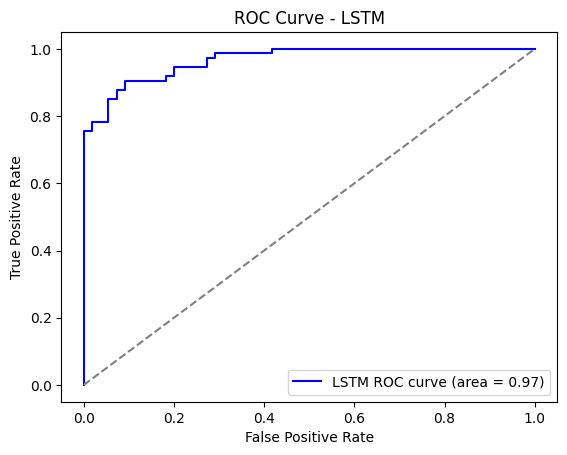

In [ ]:
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm_prob)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM ROC curve (area = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend()
plt.show()

In [ ]:
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))
rnn_model.add(SimpleRNN(64, dropout=0.2))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.summary()
rnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5623 - loss: 0.6788 - val_accuracy: 0.8077 - val_loss: 0.5745
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7586 - loss: 0.5796 - val_accuracy: 0.8654 - val_loss: 0.4780
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8734 - loss: 0.4466 - val_accuracy: 0.8846 - val_loss: 0.3908
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9415 - loss: 0.3071 - val_accuracy: 0.8846 - val_loss: 0.3146
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9548 - loss: 0.1996 - val_accuracy: 0.8654 - val_loss: 0.2812



RNN Evaluation
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
              precision    recall  f1-score   support

           0       0.79      0.62      0.69        55
           1       0.76      0.88      0.81        74

    accuracy                           0.77       129
   macro avg       0.77      0.75      0.75       129
weighted avg       0.77      0.77      0.76       129



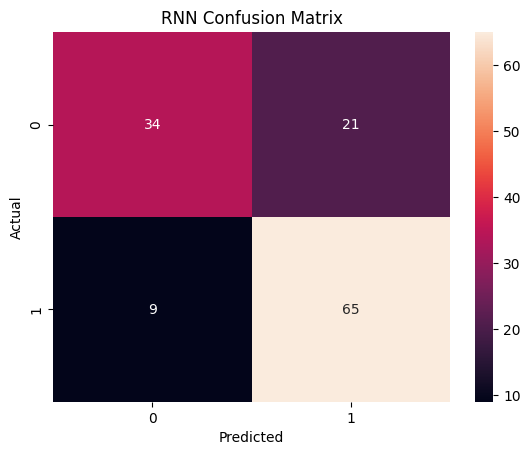

In [ ]:
print("\nRNN Evaluation")
y_pred_rnn_prob = rnn_model.predict(X_test)
y_pred_rnn = (y_pred_rnn_prob > 0.5).astype("int32")
print(classification_report(y_test, y_pred_rnn))
sns.heatmap(confusion_matrix(y_test, y_pred_rnn.flatten()), annot=True, fmt='d')
plt.title("RNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

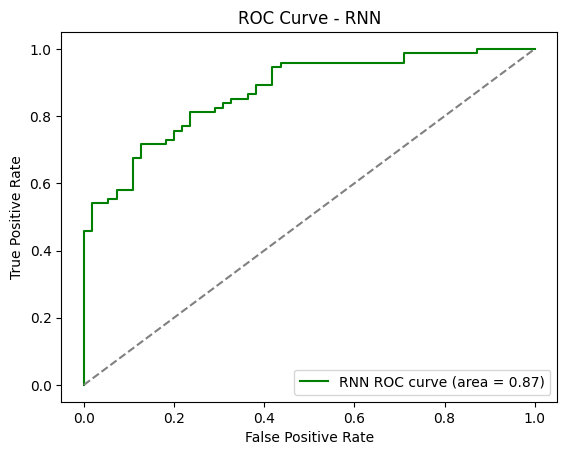

In [ ]:
fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn_prob)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)
plt.figure()
plt.plot(fpr_rnn, tpr_rnn, color='green', label=f'RNN ROC curve (area = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RNN')
plt.legend()
plt.show()

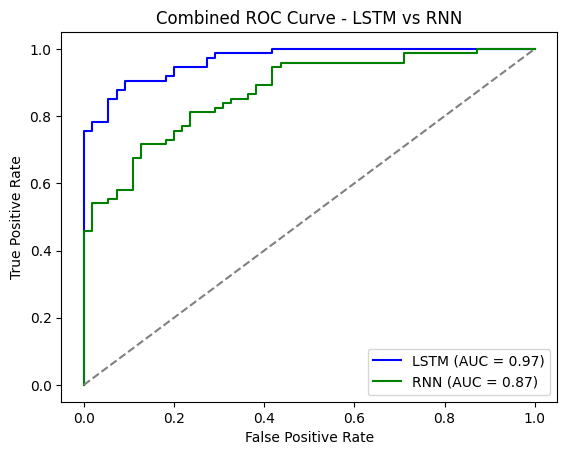

In [ ]:
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='blue', label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_rnn, tpr_rnn, color='green', label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve - LSTM vs RNN')
plt.legend()
plt.show()

In [ ]:
from scipy import stats

In [ ]:
# Additional Statistical Analysis
sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0.5, scale=1, size=100)

In [ ]:
# Z-test
z_stat, z_p = stats.ttest_ind(sample1, sample2)
print("\nZ-test (using t-test for large n): Z-statistic =", z_stat, ", p-value =", z_p)


Z-test (using t-test for large n): Z-statistic = -4.35261096807248 , p-value = 2.1545766898874697e-05


In [ ]:
# T-test
t_stat, t_p = stats.ttest_ind(sample1, sample2)
print("T-test: T-statistic =", t_stat, ", p-value =", t_p)

T-test: T-statistic = -4.35261096807248 , p-value = 2.1545766898874697e-05


In [ ]:
# Type I and Type II Errors (illustrative print)
print("\nType I Error: False positive - rejecting a true null hypothesis")
print("Type II Error: False negative - failing to reject a false null hypothesis")


Type I Error: False positive - rejecting a true null hypothesis
Type II Error: False negative - failing to reject a false null hypothesis


In [ ]:
# Mean Average Precision
from sklearn.metrics import average_precision_score
print("\nMean Average Precision for LSTM:", average_precision_score(y_test, y_pred_lstm_prob))
print("Mean Average Precision for RNN:", average_precision_score(y_test, y_pred_rnn_prob))


Mean Average Precision for LSTM: 0.9771544558179612
Mean Average Precision for RNN: 0.9125918300465566
